### Análise da Matriz de Confusão

Dada a seguinte tabela como exemplo, podemos ter:

|  | Fraude (sim) | Legítima (não) |
| --- | --- | --- |
|Fraude (sim) | 200 (TP) | 50 (FP) |
| Legítima (não)|50 (FN)|700 (TN)|

- **True Positives** (TP - verdadeiro positivo) Quando o classificador previu SIM (é fraude) e a classe correta é SIM (é fraude)
- **True Negatives** (TN - verdadeiro negativo) Quando o classificador previu NÃO (não é fraude) e a classe correta é NÂO (não é fraude)
- **False Positives** (FP - falso positivo # type I error) Quando o classificador previu SIM (é fraude) mas a classe correta era NÃO (não é fraude)
- **False Negatives** (FN - falso negativo # type II error) Quando o classificador previu NÃO (não é fraude), mas a classe correta era SIM (é fraude)

OBS: Nem sempre a taxa de acurácia maior será a melhor. Nesse caso, temos um accuracy de 90% e se para os erros tipo I e II tivermos valores distintos a empresa perde dinheiro Neste caso, o sistema classificar fraude como legítima pode trazer mais perda para a empresa do que pessoas que não eram fraude e foram classificadas como. Se fizessemos um outro modelo de classificação onde tivéssemos um accuracy menor de 89.5% mas que tivessemos menos erros de classificação tipo II (que tem maior impacto), ainda sim, seria mais viável que o primeiro modelo pois haveria menor perda de capital para a empresa.


### Precision (Precisão) e Recall (revocação)

- Dada a tabela acima, podemos pensar em quando o modelo previu SIM, o quanto ele estava correto?

TP/(TP+FP) = 200/(200+50) = 0.8

Quando o modelo preve uma fraude, ele está correto em 80% dos casos, que é a ideia do Precision

- Agora, para o recall podemos pensar em quando a classe é SIM, o quanto o modelo classificou corretamente?

TP/(TP+FN) = 200/(200+50) = 0.8, ou seja, o modelo identifica corretamente 80% de todas as fraudes da base de dados

### Validação cruzada
- K-fold Cross Validation - divide a base de dados em k partes e depois utiliza cada uma das k partes como base de dados teste e o resto treinamento  e depois faz a média das validações de cada uma das k validações
OBS: muito indicada para bases de dados menores (70% train 30% test)

###  Underfitting
Quando você tem um problema muito complexo e utiliza um algoritmo muito simples para tentar resolver o problema
- Resultados ruins na base de treinamento
### Overfitting
Quando o modelo se ajusta muito bem aos dados que já temos mas que não consegue fazer uma classificação adequada para novos dados. Se adapta/ajusta muito bem aos dados de treinamento mas não a base de teste.
- Resultados bons na base de treinamento
- Resultados ruins na base de teste
- Muito específico/memorização
- Erros na variação de novas instâncias

### Ajuste dos Parâmetros dos algoritmos

#### Tuning dos parâmetros com GridSearch
- Para bases de dados muito grandes o tempo de execução é maior

##### Preparação dos dados

In [8]:
import numpy as np

from sklearn.model_selection import GridSearchCV #CV de cross validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [6]:
import pickle
with open('credit.pkl','rb')as f:
    x_df_train, y_df_train, x_df_test, y_df_test = pickle.load(f)

In [7]:
x_df_train.shape

(1500, 3)

In [9]:
#transformando treino e teste em uma base só
x_credit = np.concatenate((x_df_train,x_df_test), axis=0) #axis = 0 para concatenar as linhas

In [10]:
x_credit.shape

(2000, 3)

In [11]:
y_credit = np.concatenate((y_df_train,y_df_test), axis=0)

In [12]:
y_credit.shape

(2000,)

**Árvore de decisão (98.2%)**

In [13]:
parametros = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [15]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

#antes tinhamos 98.2% e agora 98.3% indicando uma pequena melhoria com esses parametros

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


**Random Forest (98.40%)**

In [16]:
parametros1 = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [17]:
grid_search1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros1)
grid_search1.fit(x_credit, y_credit)
melhores_parametros = grid_search1.best_params_
melhor_resultado = grid_search1.best_score_
print(melhores_parametros)
print(melhor_resultado)

# Com esta combinação temos uma melhora nos resultados de 98.4 para 98.75%

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9875


**KNN (98.6%)**

In [18]:
parametros2 = {'n_neighbors': [3,5,10,20],
              'p': [1,2]}

In [19]:
grid_search2 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros2)
grid_search2.fit(x_credit, y_credit)
melhores_parametros = grid_search2.best_params_
melhor_resultado = grid_search2.best_score_
print(melhores_parametros)
print(melhor_resultado)

# para este algoritmo iremos manter as configurações pois através do grid search nao obtivemos uma melhora nos resultados

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


**Regressão Logística (94.60%)**

In [20]:
parametros3 = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [22]:
grid_search3 = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros3)
grid_search3.fit(x_credit, y_credit)
melhores_parametros = grid_search3.best_params_
melhor_resultado = grid_search3.best_score_
print(melhores_parametros)
print(melhor_resultado)

#com a seguinte combinação de parametros chegamos a resultados ligeiramente melhores indo de 94.6 para 94.85%

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


**SVM (98.8%)**

In [23]:
parametros4 = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [24]:
grid_search4 = GridSearchCV(estimator=SVC(), param_grid=parametros4)
grid_search4.fit(x_credit, y_credit)
melhores_parametros = grid_search4.best_params_
melhor_resultado = grid_search4.best_score_
print(melhores_parametros)
print(melhor_resultado)

#Diminuiu os resultados

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


**Redes neurais (99.60%)**

In [25]:
parametros5 = {'activation': ['relu', 'logistic','tahn'],
              'solver': ['adam','sgd'],
              'batch_size': [10, 56]}

In [26]:
grid_search5 = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros5)
grid_search5.fit(x_credit, y_credit)
melhores_parametros = grid_search5.best_params_
melhor_resultado = grid_search5.best_score_
print(melhores_parametros)
print(melhor_resultado)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


In [27]:
print(melhores_parametros)
print(melhor_resultado)

#ouve uma ligeira melhora nos resultados

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


### Validação cruzada - Implementação

In [28]:
from sklearn.model_selection import cross_val_score, KFold

In [46]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_redes_neurais = []

for i in range(30):               #vamos rodar o teste 30x que é um numero aceito na comunidade cientifica
    kfold = KFold(n_splits=10, shuffle=True, random_state=i) #com 10 splits temos 30x10 =300 testes para cada um dos algoritmos
    
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter = 'best') #utilizando os parametros encontrados no tuning
    scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
#n_splits = 10 significa que vamos dividir a base em 10 partes e 9 serao pra treinamento e 1 para teste
#shuffle=True para que o algoritmo sempre misture os dados

    #print(scores)
    #print(scores.mean())
    resultados_arvore.append(scores.mean())
    
    random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 150)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())
    
    knn = KNeighborsClassifier(n_neighbors = 20, p = 1)
    scores = cross_val_score(knn, x_credit, y_credit, cv = kfold)
    resultados_knn.append(scores.mean())
    
    reg_logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
    scores = cross_val_score(reg_logistica, x_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores.mean())
    
    svm = SVC(C = 1.5, kernel = 'rbf', tol = 0.001)
    scores = cross_val_score(svm, x_credit, y_credit, cv = kfold)
    resultados_svm.append(scores.mean())
    
    redes_neurais = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
    scores = cross_val_score(redes_neurais, x_credit, y_credit, cv = kfold)
    resultados_redes_neurais.append(scores.mean())

In [49]:
import pandas as pd
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'random_forest': resultados_random_forest,
                          'knn': resultados_knn, 'reg_logistica': resultados_logistica,
                          'svm': resultados_svm, 'redes_neurais': resultados_redes_neurais})

In [54]:
resultados

,Arvore,random_forest,knn,reg_logistica,svm,redes_neurais
0,0.9865,0.9865,0.9800,0.9475,0.9835,0.9970
1,0.9855,0.9855,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9890,0.9800,0.9470,0.9835,0.9965
3,0.9875,0.9875,0.9800,0.9460,0.9845,0.9965
4,0.9885,0.9890,0.9810,0.9465,0.9855,0.9950
5,0.9885,0.9870,0.9785,0.9465,0.9835,0.9975
6,0.9880,0.9885,0.9800,0.9470,0.9840,0.9955
7,0.9875,0.9880,0.9805,0.9480,0.9845,0.9955
8,0.9865,0.9885,0.9810,0.9465,0.9820,0.9950
9,0.9870,0.9880,0.9810,0.9465,0.9830,0.9960


In [50]:
resultados.describe()

,Arvore,random_forest,knn,reg_logistica,svm,redes_neurais
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987283,0.987433,0.980200,0.946950,0.983983,0.996433
std,0.001563,0.001202,0.001270,0.000687,0.001141,0.000828
min,0.984000,0.985500,0.977500,0.945500,0.982000,0.995000
25%,0.986500,0.986625,0.979625,0.946500,0.983500,0.996000
50%,0.987250,0.987250,0.980000,0.947000,0.984000,0.996500
75%,0.988000,0.988375,0.981000,0.947500,0.984500,0.997000
max,0.990500,0.990000,0.983500,0.948500,0.987000,0.997500


   Analisando as médias podemos chegar a conclusao que em primeiro lugar estao as redes neurais com 0.9964 e em segundo lugar o random_forest que esta muito proximo da arvore de decisao com 0.9874 e 0.9872. Depois o svm com 0.9839, knn com 0.9802 e regressao logistica com 0.9469. POdemos analisar os valores minimos e maximos para cada um dos algoritmos, por exemplo, as redes neurais com minimo de 0.9950 e max de 0.9975. Para o random forest e a arvore de decisao que possuem médias muitos próximas podemos olhar seus minimos e maximos que também são muito próximos. 
   
   O cálculo do desvio padrão é bem interessante para analisarmos a variação do algoritmo em relação a média. Quanto menor o desvio padrão menor a variação em relação a media, e podemos utilizar isso para visualizar a consistencia do algoritmo. A rede neural por exemplo, possui um desvio padrão muito pequeno, sendo assim, um algoritmo que apresenta consistencia. A regressao logistica possui um desvio padrao muito baixo, também, porém, sua média é a menor em relação aos algoritmos. A arvore de decisão possui o maior desvio padrao sendo assim tendo uma maior variação em relação a media.
   
   Quando analisamos algoritmos de classificação buscamos algoritmos que tenham maior média (accuracy) e menor desvio padrao.
   

In [55]:
(resultados.std() / resultados.mean()) * 100  #coeficiente de variacao dos algoritmos (em porcentagem)

Arvore           0.158308
random_forest    0.121682
knn              0.129601
reg_logistica    0.072517
svm              0.115937
redes_neurais    0.083064
dtype: float64

### Tópicos vistos

- Distribuição normal
- Testes de Hipótese
- teste de normalidade nos resultados
- ANOVA
- Melhor algoritmo com ANOVA e Tukey

In [56]:
# teste de normalidade nos resultados com shapiro
alpha = 0.05

In [58]:
from scipy.stats import shapiro # retorna dois valores onde o 2o valor é o p valor


In [61]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_redes_neurais)

#para o knn e para as redes neurais temos p valor < 0.05, dessa forma, rejeitamos a hipótese nula (H0), assim, temos que esses algoritmos
# nao seguem normalidade

(ShapiroResult(statistic=0.972478985786438, pvalue=0.6089913845062256),
 ShapiroResult(statistic=0.9572495222091675, pvalue=0.2630428969860077),
 ShapiroResult(statistic=0.924409031867981, pvalue=0.03495445102453232),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.96373051404953, pvalue=0.384358674287796),
 ShapiroResult(statistic=0.9006325602531433, pvalue=0.008703530766069889))

In [62]:
import seaborn as sns

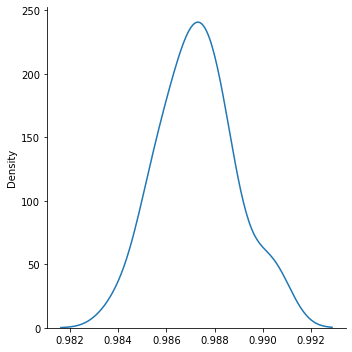

In [64]:
sns.displot(resultados_arvore, kind = 'kde')

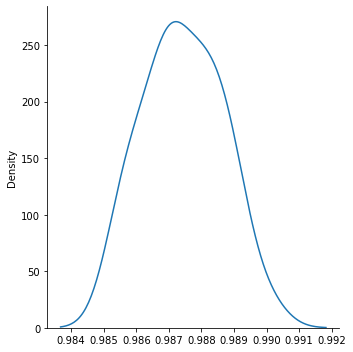

In [66]:
sns.displot(resultados_random_forest, kind = 'kde')

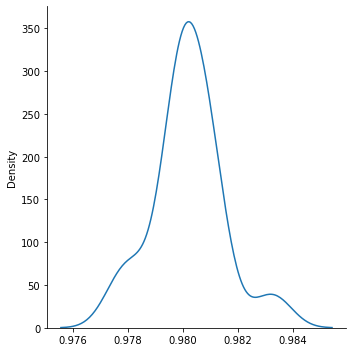

In [67]:
sns.displot(resultados_knn, kind = 'kde')

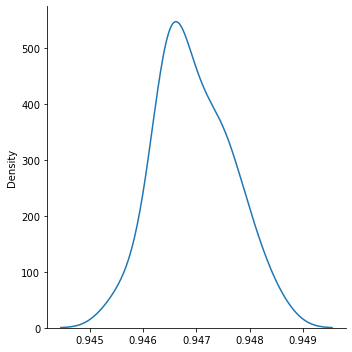

In [69]:
sns.displot(resultados_logistica, kind = 'kde')

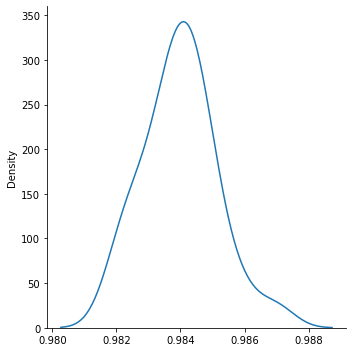

In [70]:
sns.displot(resultados_svm, kind = 'kde')

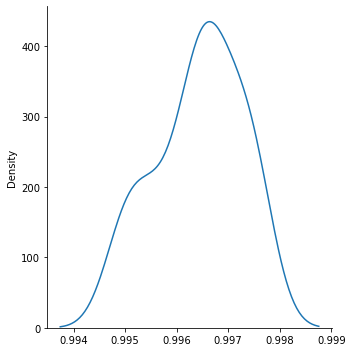

In [71]:
sns.displot(resultados_redes_neurais, kind = 'kde')

### Teste de Hipótese com ANOVA e Tukey

Apesar de dois dos algoritmos não apontarem distribuições normais, através dos gráficos podemos ver que eles apesar de possuirem
uma distorção do gráfico, ainda sim, possuem o formato da distribuição normal. Por tanto, utilizaremos a ANOVA para todos os registros

In [73]:
from scipy.stats import f_oneway

In [76]:
_,p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_redes_neurais)
p  #valor muito pequeno, indica que vamos rejeitar a hipótese nula

5.359821836784022e-197

In [77]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Não existe diferença estatistica entre os dados')

Hipótese nula rejeitada. Dados são diferentes


In [78]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_redes_neurais]),
                        'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                        'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                        'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                        'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
                        'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
                        'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais', 'redes_neurais']}

In [80]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [81]:
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9950,redes_neurais
176,0.9965,redes_neurais
177,0.9965,redes_neurais
178,0.9965,redes_neurais


In [83]:
from statsmodels.stats.multicomp import MultiComparison

In [84]:
comparacao = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [85]:
teste_estatistico = comparacao.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0071 0.001 -0.0079 -0.0062   True
       arvore     logistica  -0.0403 0.001 -0.0412 -0.0395   True
       arvore random_forest   0.0001   0.9 -0.0007   0.001  False
       arvore redes_neurais   0.0092 0.001  0.0083    0.01   True
       arvore           svm  -0.0033 0.001 -0.0042 -0.0024   True
          knn     logistica  -0.0333 0.001 -0.0341 -0.0324   True
          knn random_forest   0.0072 0.001  0.0064  0.0081   True
          knn redes_neurais   0.0162 0.001  0.0154  0.0171   True
          knn           svm   0.0038 0.001  0.0029  0.0046   True
    logistica random_forest   0.0405 0.001  0.0396  0.0413   True
    logistica redes_neurais   0.0495 0.001  0.0486  0.0503   True
    logistica           svm    0.037 0.001  0.0362  0.0379   True
random_for

In [87]:
#FWER é o valor de alpha que é 0.05 e o p-valor que é o p-adj
# percebemos que todos os algoritmos são diferentes com exceção de arvores quando comparadas ao random forest

resultados.mean()

Arvore           0.987283
random_forest    0.987433
knn              0.980200
reg_logistica    0.946950
svm              0.983983
redes_neurais    0.996433
dtype: float64

Por exrmplo, comparando arvore e redes neurais vemos que a hipótese nula foi rejeitada com p-valor de 0.001 e isso indica que o resultado entre arvore e redes neurais possuem diferença estatisticamente significativa. Para arvores temos 0.9872 e para redes neurais 0.9964, e assim, podemos provar que o algoritmo de redes neurais é estatiscamente superior ao algoritmo de arvore que ficou entre os melhores algoritmos. Dessa forma, podemos utilizar a rede neural como o  melhor algoritmo pois é estatisticamente superior a todos os outros algoritmos. 

OBS: para resultados false temos que os algoritmos nao sao estatiscamente diferentes, ou , que os resultados de um algoritmo nao sao estatisticamente superiores ao outro.

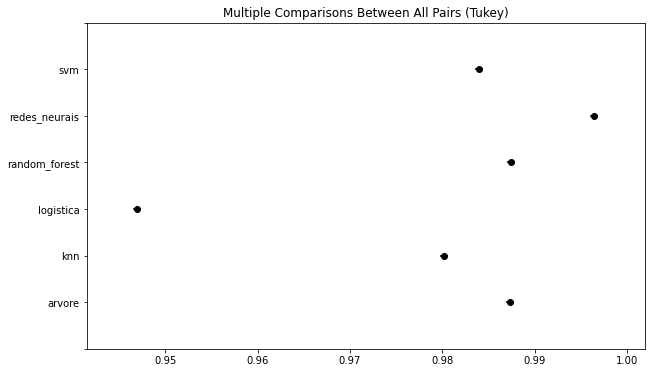

In [89]:
teste_estatistico.plot_simultaneous();

### Salvar um classificador ja treinado

In [91]:
# como iremos trabalhar com combinação e rejeicao de classificadores logo após, faremos a seleção dos 3 melhores algoritmos
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [92]:
classificador_redes_neurais = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
classificador_redes_neurais.fit(x_credit, y_credit)

MLPClassifier(batch_size=10)

In [109]:
classificador_svm = SVC(C = 1.5, kernel = 'rbf', tol = 0.001, probability=True)
classificador_svm.fit(x_credit, y_credit)

SVC(C=1.5, probability=True)

In [94]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter = 'best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [95]:
classificador_random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 150)
classificador_random_forest.fit(x_credit, y_credit)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [110]:
import pickle
pickle.dump(classificador_redes_neurais, open('redes_neurais_finalizado.sav','wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav','wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav','wb'))
pickle.dump(classificador_random_forest, open('random_forest_finalizado.sav','wb'))

### Carregar um classificador já treinado

In [98]:
rede_neural = pickle.load(open('redes_neurais_finalizado.sav','rb'))
arvore = pickle.load(open('arvore_finalizado.sav','rb'))
svm = pickle.load(open('svm_finalizado.sav','rb'))
random_forest = pickle.load(open('random_forest_finalizado.sav','rb'))

In [103]:
novo_registro = x_credit[0]
novo_registro, novo_registro.shape

(array([-1.3754462 ,  0.50631   ,  0.10980934]), (3,))

In [104]:
novo_registro = novo_registro.reshape(1,-1) 
novo_registro.shape  #formato de matriz

(1, 3)

In [105]:
rede_neural.predict(novo_registro) # 0 = vai pagar o emprestimo

array([0], dtype=int64)

In [106]:
arvore.predict(novo_registro)

array([0], dtype=int64)

In [107]:
svm.predict(novo_registro)

array([0], dtype=int64)

In [108]:
random_forest.predict(novo_registro)

array([0], dtype=int64)